# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from training import train
import matplotlib.pyplot as plt

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [3]:
param={    
    'n_step':5, #how many time steps we take before we make our TD estimate
    'n_episodes':1000, #maximum episodes to run (code will stop if average score is above 30 before this number)
    'noise':True,# controls whether Ornstein–Uhlenbeck noise is added to each parameter of the actor
    'print':False,
    'agentparam':
    {
        'device':'cpu',
        'action_size' : 2, 
        'state_size' : 24,
        'seed' : 10,
        'update_times':4, #how many times we learn at every step

        'ddpgtype':'singleval', #distribution type: 'catdist' for categorical distribution (D4PG) or "singleval" for classic DDPG
        'atoms' : 51, #atoms for D4PG


        'catparam':
        {
            'vmin' : 0, #minimum q category
            'vmax' : 1 #maximum q category
        },

        'gamma' : 0.99, #discount factor : how much future rewards are discounted
        'lr_actor' : 1e-3, #actor network learning rate
        'lr_critic' : 1e-2, #critic network learning rate
        'l2weights' : 0, #weight decay in adam optimizer, equivalent to l2 regularization
        'tau' : 1e-2, #controls how quickly the target networks are updated
        'batch_size' : 64,#how many experiences sampled in each batch

        'replay_param' :
        {
            'buffer_size': int(1e5), #max length of buffer
        },
    
        'OUparam':
        {
            'sigma': 0.2, #width of noise distribution
            'mu':0, #Noise will be centered around mu
            'theta':0.15 #how large a step we take towards the mean
        },
        
        'criticparam':
        {
            'layer_units':[300,150] #List items create layers with n number of neurons, add item for additional layer
        }, 
        
        'actorparam':
        {
            'layer_units':[200,100]  #List items create layers with n number of neurons, add item for additional layer
        }
        

    }
      }

In [4]:
scores,avgscores=train(env,param)

Episode 100	Average Score: 0.01
Episode 200	Average Score: 0.03
Episode 300	Average Score: 0.03
Episode 400	Average Score: 0.04
Episode 500	Average Score: 0.03
Episode 600	Average Score: 0.03
Episode 700	Average Score: 0.01
Episode 800	Average Score: 0.01
Episode 900	Average Score: 0.01
Episode 1000	Average Score: 0.01


(1000,)


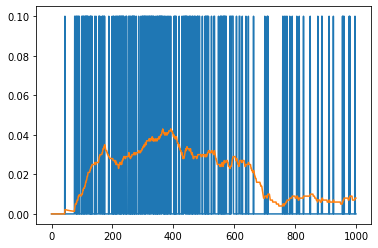

In [5]:
plt.plot(scores)
plt.plot(avgscores)
print(np.array(scores).shape)

In [ ]:
!tensorboard --logdir=runs

Serving TensorBoard on localhost; to expose to the network, use a proxy or pass --bind_all
TensorBoard 2.4.1 at http://localhost:6006/ (Press CTRL+C to quit)


In [ ]:
env.close()